In [1]:
# SPECIFICATIONS
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import boston_housing
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

In [2]:
# LOAD DATASET
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [3]:
# BUILD MODEL FUNCTION
def build_model(learning_rate=0.01, batch_size=10, epochs=20):
    model = Sequential()
    model.add(Dense(15, activation='relu', input_shape=(x_train.shape[1],)))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(1, activation='relu'))

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_absolute_error')
    return model

model = KerasRegressor(build_fn=build_model)

C:\Users\user\AppData\Local\Temp\ipykernel_10008\2662850390.py:12: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=build_model)


In [4]:
# GRID SEARCH PARAMETERS
param_grid = {'learning_rate': [0.01, 0.1, 1.0],
              'batch_size': [16, 32, 64],
              'epochs': [10, 20, 30]}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

best_model = grid_result.best_estimator_.model

Epoch 1/30
13/13 [==============================] - 0s 3ms/step - loss: 20.2608
Epoch 2/30
13/13 [==============================] - 0s 3ms/step - loss: 9.7499
Epoch 3/30
13/13 [==============================] - 0s 3ms/step - loss: 5.7033
Epoch 4/30
13/13 [==============================] - 0s 3ms/step - loss: 3.8882
Epoch 5/30
13/13 [==============================] - 0s 1ms/step - loss: 3.2440
Epoch 6/30
13/13 [==============================] - 0s 1ms/step - loss: 2.9193
Epoch 7/30
13/13 [==============================] - 0s 4ms/step - loss: 2.7139
Epoch 8/30
13/13 [==============================] - 0s 3ms/step - loss: 2.5445
Epoch 9/30
13/13 [==============================] - 0s 3ms/step - loss: 2.5766
Epoch 10/30
13/13 [==============================] - 0s 3ms/step - loss: 2.5323
Epoch 11/30
13/13 [==============================] - 0s 4ms/step - loss: 2.3694
Epoch 12/30
13/13 [==============================] - 0s 3ms/step - loss: 2.2702
Epoch 13/30
13/13 [=============================

In [5]:
# EVALUATE BEST MODEL ON TEST DATA
test_loss = best_model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)

4/4 [==============================] - 0s 3ms/step - loss: 3.1341
Test Loss: 3.1340811252593994


Epoch 1/30
11/11 [==============================] - 0s 9ms/step - loss: 2.1621 - val_loss: 2.6193
Epoch 2/30
11/11 [==============================] - 0s 6ms/step - loss: 2.2044 - val_loss: 2.0002
Epoch 3/30
11/11 [==============================] - 0s 6ms/step - loss: 2.1681 - val_loss: 2.0175
Epoch 4/30
11/11 [==============================] - 0s 6ms/step - loss: 1.8865 - val_loss: 1.9259
Epoch 5/30
11/11 [==============================] - 0s 8ms/step - loss: 1.8025 - val_loss: 1.8945
Epoch 6/30
11/11 [==============================] - 0s 9ms/step - loss: 1.8769 - val_loss: 2.0039
Epoch 7/30
11/11 [==============================] - 0s 6ms/step - loss: 1.8027 - val_loss: 2.1549
Epoch 8/30
11/11 [==============================] - 0s 10ms/step - loss: 1.8434 - val_loss: 1.8739
Epoch 9/30
11/11 [==============================] - 0s 5ms/step - loss: 1.8450 - val_loss: 1.8753
Epoch 10/30
11/11 [==============================] - 0s 9ms/step - loss: 1.8102 - val_loss: 2.1265
Epoch 11/30
11/11 

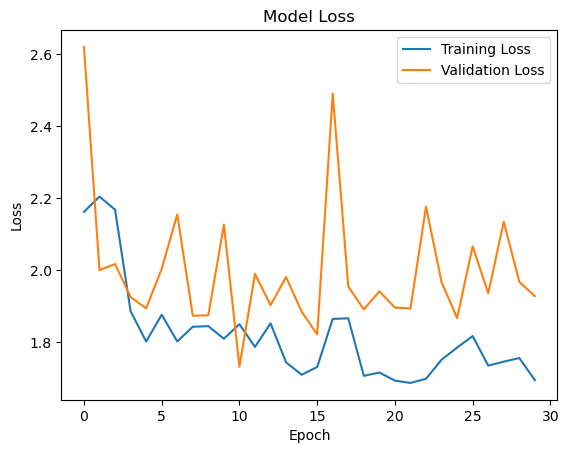

In [6]:
# TRAINING AND VALIDATION PLOT
import matplotlib.pyplot as plt

history = best_model.fit(x_train, y_train, epochs=grid_result.best_params_['epochs'], batch_size=grid_result.best_params_['batch_size'], validation_split=0.15)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()